In [1]:
import pandas as pd
from aerobot.io import load_training_data, load_validation_data, asset_path
from aerobot.utls import process_data
from sklearn.linear_model import LogisticRegression
from aerobot.models import GeneralClassifier


def get_model():
    model = GeneralClassifier(model_class=LogisticRegression, params={'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 1000000, 'C': 1})
    return model

# initialize accuray storage container
accuracies = {"feature_set":[], "accuracy":[],"balanced_accuracy":[],"test_accuracy":[],"test_balanced_accuracy":[],"model":[]}

print("running on number of genes")
features = ['number_of_genes']
feature_type = "metadata"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)
training_data["features"] = training_data["features"][features]
validation_data["features"] = validation_data["features"][features]
cleaned_data = process_data(training_data["features"], training_data["labels"]["physiology"], validation_data["features"], validation_data["labels"]["physiology"])

model = get_model()

# Fit the classifier with optimized parameters
model.fit(cleaned_data["X_train"], cleaned_data["y_train"])
accuracy = model.score(cleaned_data["X_train"], cleaned_data["y_train"])
# balanced accuracy
balanced_accuracy = model.balanced_accuracy(cleaned_data["X_train"], cleaned_data["y_train"])
#print accuracy and balanced accuracy

# compute accuracy and balanced accuracy on test set
test_accuracy = model.score(cleaned_data["X_test"], cleaned_data["y_test"])
test_balanced_accuracy = model.balanced_accuracy(cleaned_data["X_test"], cleaned_data["y_test"])

# store accuracies in a dict for analysis later
accuracies["feature_set"].append("Number of genes")
accuracies["accuracy"].append(accuracy)
accuracies["balanced_accuracy"].append(balanced_accuracy)
accuracies["test_accuracy"].append(test_accuracy)
accuracies["test_balanced_accuracy"].append(test_balanced_accuracy)
accuracies["model"].append(model)
# now train on number of oxygen genes
print("running on number of oxygen genes")
features = ['oxygen_genes']
feature_type = "metadata"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)
training_data["features"] = training_data["features"][features]
validation_data["features"] = validation_data["features"][features]
cleaned_data = process_data(training_data["features"], training_data["labels"]["physiology"], validation_data["features"], validation_data["labels"]["physiology"])

model = get_model()

# Fit the classifier with optimized parameters
model.fit(cleaned_data["X_train"], cleaned_data["y_train"])
accuracy = model.score(cleaned_data["X_train"], cleaned_data["y_train"])
# balanced accuracy
balanced_accuracy = model.balanced_accuracy(cleaned_data["X_train"], cleaned_data["y_train"])
#print accuracy and balanced accuracy

# compute accuracy and balanced accuracy on test set
test_accuracy = model.score(cleaned_data["X_test"], cleaned_data["y_test"])
test_balanced_accuracy = model.balanced_accuracy(cleaned_data["X_test"], cleaned_data["y_test"])

# store accuracies in a dict for analysis later
accuracies["feature_set"].append("Number of O2 genes")
accuracies["accuracy"].append(accuracy)
accuracies["balanced_accuracy"].append(balanced_accuracy)
accuracies["test_accuracy"].append(test_accuracy)
accuracies["test_balanced_accuracy"].append(test_balanced_accuracy)
accuracies["model"].append(model)
# now train on % of oxygen genes
print("running on % oxygen genes")
feature_type = "metadata"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)
training_data["features"]["perc_o2"] = training_data["features"]["oxygen_genes"] / training_data["features"]["number_of_annotations"]
validation_data["features"]["perc_o2"] = validation_data["features"]["oxygen_genes"] / validation_data["features"]["number_of_annotations"]
features = ['perc_o2']
training_data["features"] = training_data["features"][features]
validation_data["features"] = validation_data["features"][features]
cleaned_data = process_data(training_data["features"], training_data["labels"]["physiology"], validation_data["features"], validation_data["labels"]["physiology"])

model = get_model()

# Fit the classifier with optimized parameters
model.fit(cleaned_data["X_train"], cleaned_data["y_train"])
accuracy = model.score(cleaned_data["X_train"], cleaned_data["y_train"])
# balanced accuracy
balanced_accuracy = model.balanced_accuracy(cleaned_data["X_train"], cleaned_data["y_train"])
#print accuracy and balanced accuracy


# compute accuracy and balanced accuracy on test set
test_accuracy = model.score(cleaned_data["X_test"], cleaned_data["y_test"])
test_balanced_accuracy = model.balanced_accuracy(cleaned_data["X_test"], cleaned_data["y_test"])


# store accuracies in a dict for analysis later
accuracies["feature_set"].append("Percent O2 genes")
accuracies["accuracy"].append(accuracy)
accuracies["balanced_accuracy"].append(balanced_accuracy)
accuracies["test_accuracy"].append(test_accuracy)
accuracies["test_balanced_accuracy"].append(test_balanced_accuracy)
accuracies["model"].append(model)



# now train on gene sets, and perform hyperparameter optimization because I have multiple features now
print("running on 5 gene set")
# load gene set from assets directory, there are no columns ID or index fields
features = pd.read_csv(f"{asset_path}/gene_sets/jablonska_five_genes.csv",header=None)[0].tolist()

feature_type = "KO"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)
# only keep features that are columns in training and validationd data
features = [x for x in features if x in training_data["features"].columns.tolist() and x in validation_data["features"].columns.tolist()]

training_data["features"] = training_data["features"][features]
validation_data["features"] = validation_data["features"][features]
cleaned_data = process_data(training_data["features"], training_data["labels"]["physiology"], validation_data["features"], validation_data["labels"]["physiology"])

model = GeneralClassifier(model_class=LogisticRegression, params={'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 100000, 'C': 1})
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
best_params = model.hyperparameter_optimization(cleaned_data["X_train"], cleaned_data["y_train"], param_grid)

# Fit the classifier with optimized parameters
model.fit(cleaned_data["X_train"], cleaned_data["y_train"])
accuracy = model.score(cleaned_data["X_train"], cleaned_data["y_train"])
# balanced accuracy
balanced_accuracy = model.balanced_accuracy(cleaned_data["X_train"], cleaned_data["y_train"])
#print accuracy and balanced accuracy

# compute accuracy and balanced accuracy on test set
test_accuracy = model.score(cleaned_data["X_test"], cleaned_data["y_test"])
test_balanced_accuracy = model.balanced_accuracy(cleaned_data["X_test"], cleaned_data["y_test"])

# store accuracies in a dict for analysis later
accuracies["feature_set"].append("5 gene set genes")
accuracies["accuracy"].append(accuracy)
accuracies["balanced_accuracy"].append(balanced_accuracy)
accuracies["test_accuracy"].append(test_accuracy)
accuracies["test_balanced_accuracy"].append(test_balanced_accuracy)
accuracies["model"].append(model)
# now train on gene sets, and perform hyperparameter optimization because I have multiple features now
print("running on terminal oxidases gene set")
# load gene set from assets directory, there are no columns ID or index fields
features = pd.read_csv(f"{asset_path}/gene_sets/terminal_oxidase_genes.csv",header=None)[0].tolist()

feature_type = "KO"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)
# only keep features that are columns in training and validationd data
features = [x for x in features if x in training_data["features"].columns.tolist() and x in validation_data["features"].columns.tolist()]

training_data["features"] = training_data["features"][features]
validation_data["features"] = validation_data["features"][features]
cleaned_data = process_data(training_data["features"], training_data["labels"]["physiology"], validation_data["features"], validation_data["labels"]["physiology"])

model = get_model()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
best_params = model.hyperparameter_optimization(cleaned_data["X_train"], cleaned_data["y_train"], param_grid)

# Fit the classifier with optimized parameters
model.fit(cleaned_data["X_train"], cleaned_data["y_train"])
accuracy = model.score(cleaned_data["X_train"], cleaned_data["y_train"])
# balanced accuracy
balanced_accuracy = model.balanced_accuracy(cleaned_data["X_train"], cleaned_data["y_train"])
#print accuracy and balanced accuracy

# compute accuracy and balanced accuracy on test set
test_accuracy = model.score(cleaned_data["X_test"], cleaned_data["y_test"])
test_balanced_accuracy = model.balanced_accuracy(cleaned_data["X_test"], cleaned_data["y_test"])

# store accuracies in a dict for analysis later
accuracies["feature_set"].append("Terminal oxidase genes")
accuracies["accuracy"].append(accuracy)
accuracies["balanced_accuracy"].append(balanced_accuracy)
accuracies["test_accuracy"].append(test_accuracy)
accuracies["test_balanced_accuracy"].append(test_balanced_accuracy)
accuracies["model"].append(model)

# now train on gene sets, and perform hyperparameter optimization because I have multiple features now
print("running on O2 associated genes")
# load gene set from assets directory, there are no columns ID or index fields
features = pd.read_csv(f"{asset_path}/gene_sets/oxygen_associated_genes.csv",header=None)[0].tolist()

feature_type = "KO"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)
# only keep features that are columns in training and validationd data
features = [x for x in features if x in training_data["features"].columns.tolist() and x in validation_data["features"].columns.tolist()]

training_data["features"] = training_data["features"][features]
validation_data["features"] = validation_data["features"][features]
cleaned_data = process_data(training_data["features"], training_data["labels"]["physiology"], validation_data["features"], validation_data["labels"]["physiology"])

model = get_model()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
best_params = model.hyperparameter_optimization(cleaned_data["X_train"], cleaned_data["y_train"], param_grid)

# Fit the classifier with optimized parameters
model.fit(cleaned_data["X_train"], cleaned_data["y_train"])
accuracy = model.score(cleaned_data["X_train"], cleaned_data["y_train"])
# balanced accuracy
balanced_accuracy = model.balanced_accuracy(cleaned_data["X_train"], cleaned_data["y_train"])
#print accuracy and balanced accuracy

# compute accuracy and balanced accuracy on test set
test_accuracy = model.score(cleaned_data["X_test"], cleaned_data["y_test"])
test_balanced_accuracy = model.balanced_accuracy(cleaned_data["X_test"], cleaned_data["y_test"])

# store accuracies in a dict for analysis later
accuracies["feature_set"].append("All O2 genes")
accuracies["accuracy"].append(accuracy)
accuracies["balanced_accuracy"].append(balanced_accuracy)
accuracies["test_accuracy"].append(test_accuracy)
accuracies["test_balanced_accuracy"].append(test_balanced_accuracy)
accuracies["model"].append(model)

# now train on all KOs
print("running on KOs")
feature_type = "KO"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)
cleaned_data = process_data(training_data["features"], training_data["labels"]["physiology"], validation_data["features"], validation_data["labels"]["physiology"])

model = get_model()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
best_params = model.hyperparameter_optimization(cleaned_data["X_train"], cleaned_data["y_train"], param_grid)

# Fit the classifier with optimized parameters
model.fit(cleaned_data["X_train"], cleaned_data["y_train"])
accuracy = model.score(cleaned_data["X_train"], cleaned_data["y_train"])
# balanced accuracy
balanced_accuracy = model.balanced_accuracy(cleaned_data["X_train"], cleaned_data["y_train"])
#print accuracy and balanced accuracy

# compute accuracy and balanced accuracy on test set
test_accuracy = model.score(cleaned_data["X_test"], cleaned_data["y_test"])
test_balanced_accuracy = model.balanced_accuracy(cleaned_data["X_test"], cleaned_data["y_test"])

# store accuracies in a dict for analysis later
accuracies["feature_set"].append("All KO families")
accuracies["accuracy"].append(accuracy)
accuracies["balanced_accuracy"].append(balanced_accuracy)
accuracies["test_accuracy"].append(test_accuracy)
accuracies["test_balanced_accuracy"].append(test_balanced_accuracy)
accuracies["model"].append(model)

# now run on geneome embedding vector
print("running on genome embedding vector")

feature_type = "embedding.genome"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)
cleaned_data = process_data(training_data["features"], training_data["labels"]["physiology"], validation_data["features"], validation_data["labels"]["physiology"])

model = get_model()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
best_params = model.hyperparameter_optimization(cleaned_data["X_train"], cleaned_data["y_train"], param_grid)

# Fit the classifier with optimized parameters
model.fit(cleaned_data["X_train"], cleaned_data["y_train"])
accuracy = model.score(cleaned_data["X_train"], cleaned_data["y_train"])
# balanced accuracy
balanced_accuracy = model.balanced_accuracy(cleaned_data["X_train"], cleaned_data["y_train"])
#print accuracy and balanced accuracy

# compute accuracy and balanced accuracy on test set
test_accuracy = model.score(cleaned_data["X_test"], cleaned_data["y_test"])
test_balanced_accuracy = model.balanced_accuracy(cleaned_data["X_test"], cleaned_data["y_test"])

# store accuracies in a dict for analysis later
accuracies["feature_set"].append("genome embedding")
accuracies["accuracy"].append(accuracy)
accuracies["balanced_accuracy"].append(balanced_accuracy)
accuracies["test_accuracy"].append(test_accuracy)
accuracies["test_balanced_accuracy"].append(test_balanced_accuracy)
accuracies["model"].append(model)


accuracies = pd.DataFrame(accuracies)
print(accuracies)
# save accuracies to a pickle file
accuracies.to_pickle("models/l1_lm_models.pkl")

running on number of genes
running on number of oxygen genes
running on % oxygen genes
running on 5 gene set
running on terminal oxidases gene set
running on O2 associated genes
running on KOs
running on genome embedding vector
              feature_set  accuracy  balanced_accuracy  test_accuracy  \
0         Number of genes  0.618096           0.466482       0.503676   
1      Number of O2 genes  0.782902           0.603371       0.665441   
2        Percent O2 genes  0.803467           0.615813       0.687500   
3        5 gene set genes  0.733918           0.572618       0.676471   
4  Terminal oxidase genes  0.794444           0.608601       0.628676   
5            All O2 genes  0.846199           0.722653       0.746324   
6         All KO families  0.960819           0.931916       0.750000   
7        genome embedding  0.892479           0.813192       0.617647   

   test_balanced_accuracy                                              model  
0                0.440509  <aerobot

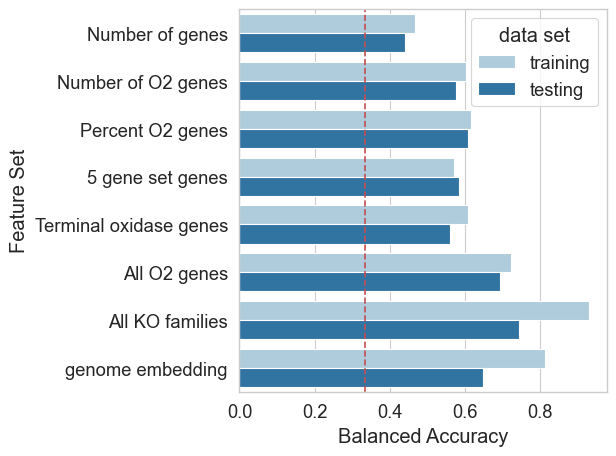

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
dfx = accuracies[["feature_set","balanced_accuracy","test_balanced_accuracy"]].set_index("feature_set")
dfx.columns = ["training","test"]
# Create a new DataFrame with 'X', 'Y', and 'value' columns

training_df = dfx[["training"]]
training_df.columns = ["balanced accuracy"]
training_df["data set"] = "training"
testing_df = dfx[["test"]]
testing_df.columns = ["balanced accuracy"]
testing_df["data set"] = "testing"
skinny_df = pd.concat([training_df,testing_df],axis=0).reset_index()

# plot a horizontal bar plot with seaborn, color by data set, and y axis is feature set
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Paired")
ax = sns.barplot(x="balanced accuracy", y="feature_set", hue="data set", data=skinny_df)
ax.set(xlabel='Balanced Accuracy', ylabel='Feature Set')
plt.tight_layout()

# plot a vertical dotted line in red corresponding to a random model, which would have a balanced accuracy of 1/3
plt.axvline(x=1/3, color='r', linestyle='--')



In [15]:
dfx

,training,test
feature_set,,
Number of genes,0.466482,0.440509
Number of O2 genes,0.603371,0.576282
Percent O2 genes,0.615813,0.608586
5 gene set genes,0.572618,0.584547
Terminal oxidase genes,0.608601,0.562082
All O2 genes,0.722653,0.695236
All KO families,0.931916,0.745237
genome embedding,0.813192,0.648386


In [9]:
skinny_df

,data set,value
0,training,0.466482
1,training,0.603371
2,training,0.615813
3,training,0.572618
4,training,0.608601
5,training,0.722653
6,training,0.931916
7,training,0.813192
8,test,0.440509
9,test,0.576282
